In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300) # or 1000.
pd. set_option('display.max_rows', 300) # or 1000.
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('H2HBABBA2704.csv',nrows=50000)
data.shape

(50000, 19)

In [3]:
data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200661137,AFFI,2019-05-22 00:00:00,2019.0,1.929318e+09,2019-05-14,20190514,20190514,20190529.0,USD,RV,1.0,NaN,14587.48,20190514.0,NAA8,1.929318e+09,0
1,U001,0200761734,H E BUT in,2019-10-25 00:00:00,2019.0,1.930002e+09,2019-10-11,20191011,20191011,20191026.0,USD,RV,1.0,NaN,93177.98,20191011.0,NAA8,1.930002e+09,0
2,U001,0200793568,SUPE corporation,2019-12-12 00:00:00,2019.0,1.930198e+09,2019-11-26,20191126,20191126,20191211.0,USD,RV,1.0,NaN,70178.87,20191126.0,NAA8,1.930198e+09,0
3,U001,0200762301,C&S WH systems,2019-10-28 00:00:00,2019.0,1.929996e+09,2019-10-11,20191010,20191011,20191026.0,USD,RV,1.0,NaN,275.08,20191011.0,NAC6,1.929996e+09,0
4,U001,0200769623,WAL-MAR foundation,2020-01-14 00:00:00,2020.0,1.930347e+09,2020-01-02,20200102,20200102,20200117.0,USD,RV,1.0,NaN,38531.58,20200102.0,NAH4,1.930347e+09,0


# Preprocess the data

In [4]:
data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [5]:
###ull imputation
data.drop(columns=['area_business'],inplace=True)

In [6]:
data['document type'].unique()
#so by this we can tell document type has two unique values

array(['RV', 'X2'], dtype=object)

In [7]:
data[data.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1273,CA02,0140104429,COSTCO,2019-05-14 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,5353.20,20190311.0,CA10,NaN,0
31139,CA02,0140106054,TREE corporation,2019-06-17 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190322,20190401.0,CAD,X2,1.0,25215.84,20190322.0,CA10,NaN,0


In [8]:
data.dropna(axis=0,how='any', subset=['invoice_id'],inplace=True)
data['invoice_id'] = data['invoice_id'].astype('int64')

In [9]:
data.corr()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.013750,0.978518,0.983787,0.989946,NaN,-0.003114,0.984618,-0.013750,0.755405
doc_id,-0.013750,1.000000,-0.010878,-0.012525,-0.014089,NaN,0.186388,-0.008860,1.000000,-0.009627
document_create_date,0.978518,-0.010878,1.000000,0.994403,0.975394,NaN,-0.000218,0.993462,-0.010878,0.765413
document_create_date.1,0.983787,-0.012525,0.994403,1.000000,0.980160,NaN,-0.000851,0.999052,-0.012525,0.765369
due_in_date,0.989946,-0.014089,0.975394,0.980160,1.000000,NaN,-0.003113,0.981074,-0.014089,0.756011
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.003114,0.186388,-0.000218,-0.000851,-0.003113,NaN,1.000000,-0.000319,0.186388,0.003435
baseline_create_date,0.984618,-0.008860,0.993462,0.999052,0.981074,NaN,-0.000319,1.000000,-0.008860,0.765220
invoice_id,-0.013750,1.000000,-0.010878,-0.012525,-0.014089,NaN,0.186388,-0.008860,1.000000,-0.009627
isOpen,0.755405,-0.009627,0.765413,0.765369,0.756011,NaN,0.003435,0.765220,-0.009627,1.000000


In [10]:
#droping the similar column
data.drop(columns=['posting_id'],inplace=True)
data.drop(columns=['invoice_id'],inplace=True)

In [11]:
len(data.loc[data['document type']=='X2',:])

0

In [12]:
len(data.loc[data['document type']=='RV',:])

49998

In [13]:
# based on the above result we can tell that 'document type is quasi constant'
data.drop(['document type'],1,inplace=True)

In [14]:
data=data.drop_duplicates(keep='first')

In [15]:
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
isOpen                      int64
dtype: object

In [16]:
data['clear_date'] = pd.to_datetime(data['clear_date'])
data.rename({'document_create_date.1':'document_create_date1'},axis=1,inplace=True)
data['document_create_date1']=pd.to_datetime(data['document_create_date1'], format='%Y%m%d')
data['isOpen']=data.isOpen.astype(float)
data['doc_id'] = data['doc_id'].astype('int64')
data['buisness_year']=data['buisness_year'].astype('int64')
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['document_create_date'] = pd.to_datetime(data['document_create_date'],format='%Y%m%d')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'],format='%Y%m%d')

In [17]:
data.nunique()

business_code                6
cust_number               1413
name_customer             4155
clear_date                 400
buisness_year                2
doc_id                   48817
posting_date               505
document_create_date       506
document_create_date1      505
due_in_date                546
invoice_currency             2
total_open_amount        44159
baseline_create_date       505
cust_payment_terms          73
isOpen                       2
dtype: int64

In [18]:
data['posting_date']==data['document_create_date1']

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Length: 48817, dtype: bool

In [19]:
data.drop(columns=['document_create_date1'],inplace=True)

In [20]:
main_train = data[data.clear_date.isnull()==False]
main_test = data[data.clear_date.isnull()]

In [21]:
main_train.shape

(39111, 14)

In [22]:
main_train.isna().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
isOpen                  0
dtype: int64

In [23]:
main_train.nunique()

business_code               6
cust_number              1331
name_customer            3867
clear_date                400
buisness_year               2
doc_id                  39111
posting_date              423
document_create_date      427
due_in_date               488
invoice_currency            2
total_open_amount       35586
baseline_create_date      430
cust_payment_terms         70
isOpen                      1
dtype: int64

# Merging the cust_payment terms into one as below 15 many values are repeated

In [24]:
a=pd.DataFrame(main_train['cust_payment_terms'].value_counts())
b1=np.array(a.loc[a['cust_payment_terms']<15].index)
b1

array(['NA9X', 'BR56', 'NA84', 'NAVD', 'NAVL', 'NA3F', 'NAUP', 'NAM3',
       'NAVC', 'NA31', 'NACE', 'CAB1', 'BR12', '90M7', 'NATK', 'NA8Q',
       'NAUI', 'NATH', 'NA25', 'NATV', 'NATM', 'NATX', 'NATW', 'NAV2',
       'NAUX', 'NATZ', 'NAWM', 'B052', 'NAUN', 'NANC', 'B112', 'C129',
       'NA24', 'CAX2', 'NAV9', 'NAUW'], dtype=object)

In [25]:
a.loc[a['cust_payment_terms']<15]

,cust_payment_terms
NA9X,14
BR56,11
NA84,11
NAVD,10
NAVL,10
NA3F,10
NAUP,8
NAM3,6
NAVC,3
NA31,3


In [26]:
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(b1),"Other cust_payment_terms",main_train['cust_payment_terms'])

In [27]:
series = pd.value_counts(main_train.cust_number)
mask = (series/series.sum() * 100).lt(1)

In [28]:
series = pd.value_counts(main_train.cust_number)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
main_train['cust_number'] = np.where(main_train['cust_number'].isin(series[mask].index),'Other',main_train['cust_number'])

In [29]:
main_train['cust_number'].value_counts()

Other         20603
0200769623     8682
0200726979     1502
0200762301     1226
0200759878     1126
0200794332      921
0200744019      769
0200772670      705
200769623       648
0200705742      599
CCU013          537
0200707822      519
CCCA02          478
0140106408      403
0140104409      393
Name: cust_number, dtype: int64

In [30]:
for col in main_train.columns:
    if main_train[col].nunique()<= 6:
        print(main_train[col].value_counts())
        print('#########################')

U001    35361
CA02     3100
U013      504
U002      128
U005       16
U007        2
Name: business_code, dtype: int64
#########################
2019    33988
2020     5123
Name: buisness_year, dtype: int64
#########################
USD    36010
CAD     3101
Name: invoice_currency, dtype: int64
#########################
0.0    39111
Name: isOpen, dtype: int64
#########################


In [31]:
main_train['business_code'] = np.where(main_train['business_code'].isin(["U005","U007",]),"Other code",main_train['business_code'])

In [32]:
main_train['business_code'].value_counts()

U001          35361
CA02           3100
U013            504
U002            128
Other code       18
Name: business_code, dtype: int64

In [33]:
main_train['delay']=main_train['clear_date']-main_train['due_in_date']

In [34]:
main_train['delay'] = main_train['delay'].dt.days.astype('int64')

In [35]:
data.drop(columns=['clear_date'],inplace=True)

In [36]:
main_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                         float64
delay                            int64
dtype: object

In [37]:
#sort values by data as the delay is dependent on the due_in_date 
# we only use past data to train the model , hence sorting ensures that while splittig the data only past data is there on the train set
main_train.sort_values(by=['posting_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
42748,U001,Other,SUPE foundation,2019-01-14,2019,1928539286,2018-12-30,2018-12-29,2019-01-14,USD,26321.27,2018-12-30,NAA8,0.0,0
20490,CA02,Other,SHOPPE corporation,2019-01-18,2019,2960520361,2018-12-30,2018-12-30,2019-01-12,CAD,6717.60,2019-01-02,CA10,0.0,6
10510,U001,0200705742,DOT foundation,2019-01-31,2019,1928532938,2018-12-30,2018-12-29,2019-01-27,USD,68430.17,2018-12-30,Other cust_payment_terms,0.0,4
42456,U001,0200769623,WAL-MAR trust,2019-01-10,2019,1928543801,2018-12-30,2018-12-30,2019-01-14,USD,8780.98,2018-12-30,NAH4,0.0,-4
638,U001,0200707822,PUBLI in,2019-01-14,2019,1928543934,2018-12-30,2018-12-30,2019-01-14,USD,87305.69,2018-12-30,NAA8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34596,U001,Other,WINC in,2020-03-12,2020,1930566250,2020-02-26,2020-02-25,2020-03-12,USD,818.24,2020-02-26,NAA8,0.0,0
10167,CA02,Other,GORDON F foundation,2020-03-13,2020,2960617053,2020-02-27,2020-02-27,2020-03-10,CAD,45364.85,2020-02-29,CA10,0.0,3
36093,U001,Other,MCLANE systems,2020-03-18,2020,1930557596,2020-02-27,2020-02-22,2020-03-13,USD,53264.58,2020-02-27,NAA8,0.0,5
21564,U001,Other,GO in,2020-03-13,2020,1930572649,2020-02-27,2020-02-26,2020-03-13,USD,6990.72,2020-02-27,NAA8,0.0,0


In [38]:
#converting CAD TO USD (1 CAD =0.81 USD) because more usd values are there

In [39]:
main_train['total_open_amount']

0        14587.48
1        93177.98
2        70178.87
3          275.08
4        38531.58
           ...   
49995      629.67
49996     1574.14
49997       48.76
49998     1695.68
49999    14521.16
Name: total_open_amount, Length: 39111, dtype: float64

In [40]:
main_train.loc[main_train['invoice_currency']=='CAD','total_open_amount']=0.81337274*main_train['total_open_amount']
main_train.loc[main_train['invoice_currency']=='CAD','invoice_currency']='USD'

In [41]:
main_train['total_open_amount']

0        14587.480000
1        93177.980000
2        70178.870000
3          275.080000
4        38531.580000
             ...     
49995      629.670000
49996     1574.140000
49997       39.660055
49998     1695.680000
49999    14521.160000
Name: total_open_amount, Length: 39111, dtype: float64

In [42]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,Other,AFFI,2019-05-22,2019,1929318276,2019-05-14,2019-05-14,2019-05-29,USD,14587.480000,2019-05-14,NAA8,0.0,-7
1,U001,Other,H E BUT in,2019-10-25,2019,1930001827,2019-10-11,2019-10-11,2019-10-26,USD,93177.980000,2019-10-11,NAA8,0.0,-1
2,U001,Other,SUPE corporation,2019-12-12,2019,1930198310,2019-11-26,2019-11-26,2019-12-11,USD,70178.870000,2019-11-26,NAA8,0.0,1
3,U001,0200762301,C&S WH systems,2019-10-28,2019,1929996414,2019-10-11,2019-10-10,2019-10-26,USD,275.080000,2019-10-11,NAC6,0.0,2
4,U001,0200769623,WAL-MAR foundation,2020-01-14,2020,1930347116,2020-01-02,2020-01-02,2020-01-17,USD,38531.580000,2020-01-02,NAH4,0.0,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR corporation,2020-02-18,2020,1930503676,2020-02-08,2020-02-08,2020-02-23,USD,629.670000,2020-02-08,NAH4,0.0,-5
49996,U001,Other,SUPE foundation,2019-10-24,2019,1929971252,2019-10-07,2019-10-05,2019-10-22,USD,1574.140000,2019-10-07,NAA8,0.0,2
49997,CA02,Other,SYSC systems,2019-02-19,2019,2960524134,2019-01-24,2019-01-24,2019-02-10,USD,39.660055,2019-01-31,CA10,0.0,9
49998,U001,0200769623,WAL-MAR trust,2019-08-27,2019,1929748886,2019-08-16,2019-08-15,2019-08-31,USD,1695.680000,2019-08-16,NAH4,0.0,-4


# Split Data

In [43]:
X = main_train.drop('delay',axis=1)

# y --> contains only the target value 
y = main_train['delay']

In [44]:
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [45]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [46]:
X_train.shape , X_val.shape , X_test.shape

((27377, 14), (5867, 14), (5867, 14))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

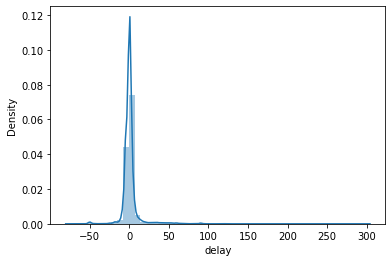

In [47]:
sns.distplot(y_train)

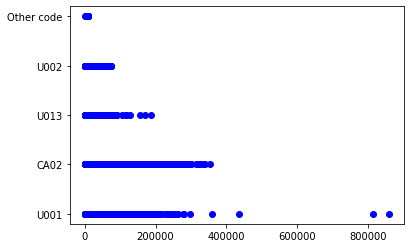

In [48]:
plt.scatter(X_train['total_open_amount'], X_train['business_code'],color='b')
plt.show()

In [49]:
#finding outliers

<AxesSubplot:xlabel='total_open_amount'>

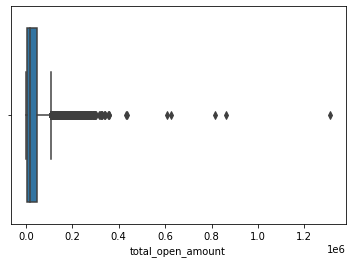

In [50]:
sns.boxplot(main_train['total_open_amount'])
# as you notice there are lot of outliers so many cant be removed due to data loss

<AxesSubplot:xlabel='delay', ylabel='due_in_date'>

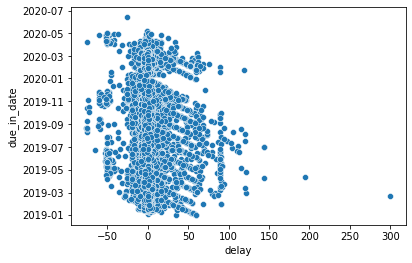

In [51]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="due_in_date")

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

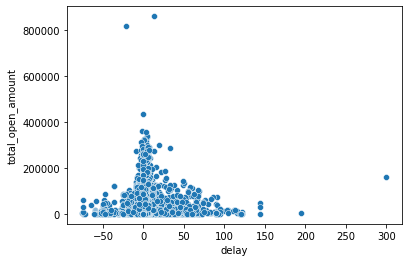

In [52]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

In [53]:
X_train.nunique()

business_code               5
cust_number                15
name_customer            3287
clear_date                392
buisness_year               2
doc_id                  27377
posting_date              422
document_create_date      425
due_in_date               485
invoice_currency            1
total_open_amount       25260
baseline_create_date      428
cust_payment_terms         35
isOpen                      1
dtype: int64

# feature engineering

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27377 entries, 0 to 34777
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27377 non-null  object        
 1   cust_number           27377 non-null  object        
 2   name_customer         27377 non-null  object        
 3   clear_date            27377 non-null  datetime64[ns]
 4   buisness_year         27377 non-null  int64         
 5   doc_id                27377 non-null  int64         
 6   posting_date          27377 non-null  datetime64[ns]
 7   document_create_date  27377 non-null  datetime64[ns]
 8   due_in_date           27377 non-null  datetime64[ns]
 9   invoice_currency      27377 non-null  object        
 10  total_open_amount     27377 non-null  float64       
 11  baseline_create_date  27377 non-null  datetime64[ns]
 12  cust_payment_terms    27377 non-null  object        
 13  isOpen          

In [55]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [57]:
X_train['cust_number'].value_counts()

Other         14414
0200769623     6088
0200726979     1075
0200762301      854
0200759878      791
0200794332      646
0200744019      553
0200772670      483
200769623       459
0200705742      421
CCU013          383
0200707822      338
CCCA02          333
0140104409      270
0140106408      269
Name: cust_number, dtype: int64

In [60]:
X_train.cust_number.value_counts()

Other         14414
0200769623     6088
0200726979     1075
0200762301      854
0200759878      791
0200794332      646
0200744019      553
0200772670      483
200769623       459
0200705742      421
CCU013          383
0200707822      338
CCCA02          333
0140104409      270
0140106408      269
Name: cust_number, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])
X_val['cust_number_enc'] = cust_number_encoder.transform(X_val['cust_number'])
X_test['cust_number_enc'] = cust_number_encoder.transform(X_test['cust_number'])

In [62]:
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [63]:
X_train.drop(['cust_number'], axis =1,inplace=True)
X_val.drop(['cust_number'],axis=1 , inplace=True)
X_test.drop(['cust_number'],axis=1 , inplace=True)

In [64]:
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_test['cust_payment_terms'])

In [65]:
# function will delete a column from train , val and test
def fastdropping(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [66]:
# wrote a custom function to do a status check  on all the dataframes 
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())

In [67]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5867 entries, 34779 to 42329
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           5867 non-null   object        
 1   clear_date              5867 non-null   datetime64[ns]
 2   buisness_year           5867 non-null   int64         
 3   doc_id                  5867 non-null   int64         
 4   posting_date            5867 non-null   datetime64[ns]
 5   document_create_date    5867 non-null   datetime64[ns]
 6   due_in_date             5867 non-null   datetime64[ns]
 7   invoice_currency        5867 non-null   object        
 8   total_open_amount       5867 non-null   float64       
 9   baseline_create_date    5867 non-null   datetime64[ns]
 10  cust_payment_terms      5867 non-null   object        
 11  isOpen                  5867 non-null   float64       
 12  business_code_enc       5867 non-null   int

In [68]:
X_train ,X_val, X_test = fastdropping(['isOpen'])

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27377 entries, 0 to 34777
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           27377 non-null  object        
 1   clear_date              27377 non-null  datetime64[ns]
 2   buisness_year           27377 non-null  int64         
 3   doc_id                  27377 non-null  int64         
 4   posting_date            27377 non-null  datetime64[ns]
 5   document_create_date    27377 non-null  datetime64[ns]
 6   due_in_date             27377 non-null  datetime64[ns]
 7   invoice_currency        27377 non-null  object        
 8   total_open_amount       27377 non-null  float64       
 9   baseline_create_date    27377 non-null  datetime64[ns]
 10  cust_payment_terms      27377 non-null  object        
 11  business_code_enc       27377 non-null  int32         
 12  cust_number_enc         27377 non-null  int32 

In [70]:
#0 --> Monday , 6 --> Sunday
X_train['week_of_duedate'] = X_train['due_in_date'].dt.weekday 
X_val['week_of_duedate'] = X_val['due_in_date'].dt.weekday 
X_test['week_of_duedate'] = X_test['due_in_date'].dt.weekday

In [71]:
#extract day,month and year 

X_train['day_of_duedate'] = X_train['due_in_date'].dt.day
X_train['month_of_duedate'] = X_train['due_in_date'].dt.month
X_train['year_of_duedate'] = X_train['due_in_date'].dt.year

X_val['day_of_duedate'] = X_val['due_in_date'].dt.day
X_val['month_of_duedate'] = X_val['due_in_date'].dt.month
X_val['year_of_duedate'] = X_val['due_in_date'].dt.year


X_test['day_of_duedate'] = X_test['due_in_date'].dt.day
X_test['month_of_duedate'] = X_test['due_in_date'].dt.month
X_test['year_of_duedate'] = X_test['due_in_date'].dt.year

In [72]:
#0 --> Monday , 6 --> Sunday
X_train['week_of_posting_date'] = X_train['posting_date'].dt.weekday 
X_val['week_of_posting_date'] = X_val['posting_date'].dt.weekday 
X_test['week_of_posting_date'] = X_test['posting_date'].dt.weekday
X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month
X_train['year_of_posting_date'] = X_train['posting_date'].dt.year

X_val['day_of_posting_date'] = X_val['posting_date'].dt.day
X_val['month_of_posting_date'] = X_val['posting_date'].dt.month
X_val['year_of_posting_date'] = X_val['posting_date'].dt.year


X_test['day_of_posting_date'] = X_test['posting_date'].dt.day
X_test['month_of_posting_date'] = X_test['posting_date'].dt.month
X_test['year_of_posting_date'] = X_test['posting_date'].dt.year

In [73]:
# day,month,year,week seperated from document_create_date in X_Train,X_Val,X_Test

X_train['day_of_document_create_date'] = X_train['document_create_date'].dt.day
X_train['month_of_document_create_date'] = X_train['document_create_date'].dt.month
X_train['year_of_document_create_date'] = X_train['document_create_date'].dt.year
X_train['week_of_document_create_date'] = X_train['document_create_date'].dt.week

X_val['day_of_document_create_date'] = X_val['document_create_date'].dt.day
X_val['month_of_document_create_date'] = X_val['document_create_date'].dt.month
X_val['year_of_document_create_date'] = X_val['document_create_date'].dt.year
X_val['week_of_document_create_date'] = X_val['document_create_date'].dt.week

X_test['day_of_document_create_date'] = X_test['document_create_date'].dt.day
X_test['month_of_document_create_date'] = X_test['document_create_date'].dt.month
X_test['year_of_document_create_date'] = X_test['document_create_date'].dt.year
X_test['week_of_document_create_date'] = X_test['document_create_date'].dt.week

# day,month,year,week seperated from document_create_date in X_Train,X_Val,X_Test

X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year
X_train['week_of_baseline_create_date'] = X_train['baseline_create_date'].dt.week

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year
X_val['week_of_baseline_create_date'] = X_val['baseline_create_date'].dt.week

X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year
X_test['week_of_baseline_create_date'] = X_test['baseline_create_date'].dt.week
# day,month,year,week seperated from clear_date in X_Train,X_Val,X_Test

In [74]:
X_train ,X_val, X_test = fastdropping(['due_in_date'])
X_train ,X_val, X_test = fastdropping(['posting_date'])

In [75]:
X_train ,X_val, X_test = fastdropping(['name_customer','baseline_create_date','document_create_date'])

In [76]:
X_train ,X_val, X_test = fastdropping(['invoice_currency'])

In [77]:
X_train ,X_val, X_test = fastdropping(['cust_payment_terms'])

In [78]:
X_train ,X_val, X_test = fastdropping(['clear_date'])

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27377 entries, 0 to 34777
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   buisness_year                  27377 non-null  int64  
 1   doc_id                         27377 non-null  int64  
 2   total_open_amount              27377 non-null  float64
 3   business_code_enc              27377 non-null  int32  
 4   cust_number_enc                27377 non-null  int32  
 5   cust_payment_terms_enc         27377 non-null  int32  
 6   week_of_duedate                27377 non-null  int64  
 7   day_of_duedate                 27377 non-null  int64  
 8   month_of_duedate               27377 non-null  int64  
 9   year_of_duedate                27377 non-null  int64  
 10  week_of_posting_date           27377 non-null  int64  
 11  day_of_posting_date            27377 non-null  int64  
 12  month_of_posting_date          27377 non-null 

In [80]:
X_train['total_open_amount'] = X_train['total_open_amount'].astype('int64')
X_val['total_open_amount'] = X_val['total_open_amount'].astype('int64')
X_test['total_open_amount'] = X_test['total_open_amount'].astype('int64')

In [81]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27377 entries, 0 to 34777
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   buisness_year                  27377 non-null  int64
 1   doc_id                         27377 non-null  int64
 2   total_open_amount              27377 non-null  int64
 3   business_code_enc              27377 non-null  int32
 4   cust_number_enc                27377 non-null  int32
 5   cust_payment_terms_enc         27377 non-null  int32
 6   week_of_duedate                27377 non-null  int64
 7   day_of_duedate                 27377 non-null  int64
 8   month_of_duedate               27377 non-null  int64
 9   year_of_duedate                27377 non-null  int64
 10  week_of_posting_date           27377 non-null  int64
 11  day_of_posting_date            27377 non-null  int64
 12  month_of_posting_date          27377 non-null  int64
 13  year_of_posting_

In [82]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27377 entries, 0 to 34777
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   buisness_year                  27377 non-null  int64
 1   doc_id                         27377 non-null  int64
 2   total_open_amount              27377 non-null  int64
 3   business_code_enc              27377 non-null  int32
 4   cust_number_enc                27377 non-null  int32
 5   cust_payment_terms_enc         27377 non-null  int32
 6   week_of_duedate                27377 non-null  int64
 7   day_of_duedate                 27377 non-null  int64
 8   month_of_duedate               27377 non-null  int64
 9   year_of_duedate                27377 non-null  int64
 10  week_of_posting_date           27377 non-null  int64
 11  day_of_posting_date            27377 non-null  int64
 12  month_of_posting_date          27377 non-null  int64
 13  year_of_posting_

# feature selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

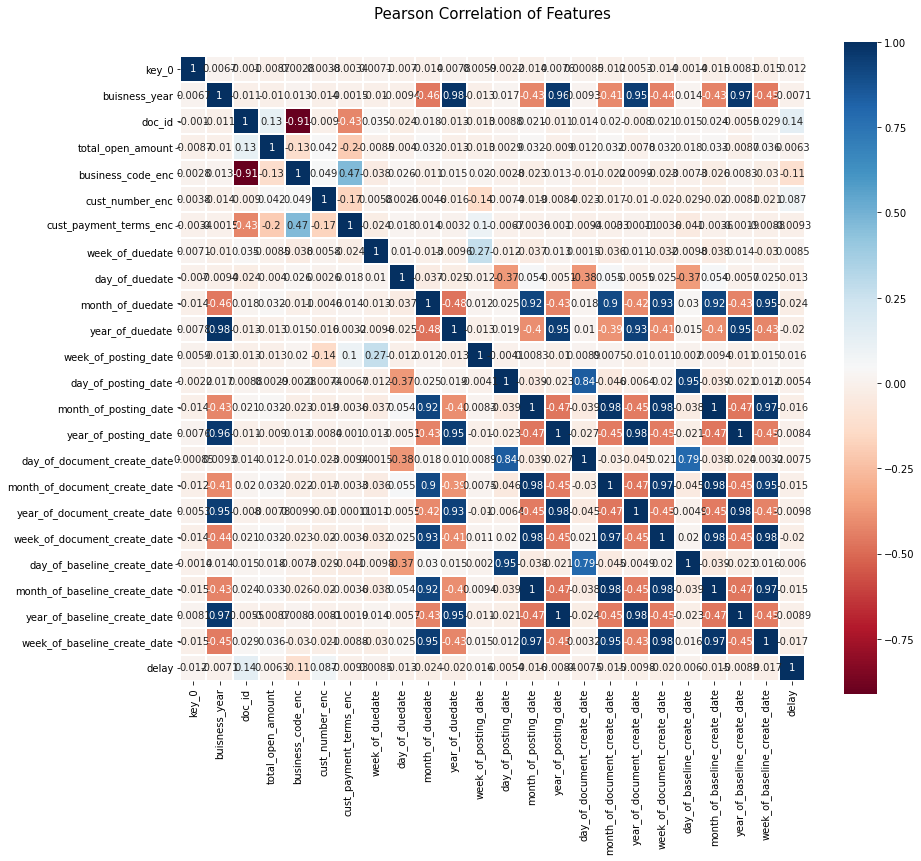

In [83]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# modeling

In [84]:
###create a base model

In [85]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [86]:
y_predict = base_model.predict(X_val)

In [87]:
y_predict

array([ 8.17486167, 10.97861413, -0.42571367, ..., -1.55668305,
        0.70046718, -4.95922167])

In [88]:
import math

In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict,squared=False)

10.022653135385719

In [90]:
#Tree based model

In [91]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=6)

In [92]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [93]:
y_predict2 = regressor.predict(X_val)

In [94]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict2,squared=False)

8.469406116140423

In [95]:
#RandomForestRegressor

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [97]:
regr = RandomForestRegressor(max_depth=5, random_state=0)

In [98]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [99]:
y_predict3 = regr.predict(X_val)

In [100]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict3,squared=False)

8.506856920072392

In [ ]:
###predicting X_test
y_predict_test = regressor.predict(X_test)
mse3=mean_squared_error(y_test, y_predict_test)

In [ ]:
import math
rmse=math.sqrt(mse3)
rmse

In [ ]:
#same to main_test

In [ ]:
# see again cleardate is all nan
main_test

In [ ]:
# Preprocessing

In [ ]:
main_test.isna().sum()

In [ ]:
X_main_test = main_test.drop(['clear_date'],axis=1)
X_main_test

# ALSO LETS DROP PRICE FROM MAIN TEST ITSELF
main_test.drop(['clear_date'], inplace =True,axis=1)

In [ ]:
main_test.info()

In [ ]:
#Feature Engg

##Remember exactly same set of feature even the column name should be same 

In [ ]:
a=pd.DataFrame(main_test['cust_payment_terms'].value_counts())
b1=np.array(a.loc[a['cust_payment_terms']<15].index)
b1

In [ ]:
a.loc[a['cust_payment_terms']<15]

In [115]:
main_test['cust_payment_terms'] = np.where(main_test['cust_payment_terms'].isin(b1),"Other cust_payment_terms",main_test['cust_payment_terms'])

In [116]:
series = pd.value_counts(main_test.cust_number)
mask = (series/series.sum() * 100).lt(1)

In [117]:
series = pd.value_counts(main_test.cust_number)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
main_test['cust_number'] = np.where(main_test['cust_number'].isin(series[mask].index),'Other',main_test['cust_number'])

In [118]:
main_test['business_code'] = np.where(main_test['business_code'].isin(["U005","U007",]),"Other code",main_test['business_code'])

In [119]:
main_test['business_code'].value_counts()

U001          8912
CA02           702
U013            69
U002            20
Other code       3
Name: business_code, dtype: int64

In [120]:
main_test.sort_values(by=['posting_date'])

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
5873,U001,Other,KROGE,2020,1930576050,2020-02-27,2020-02-27,2020-03-13,USD,59406.19,2020-02-27,NAA8,1.0
9468,CA02,Other,COSTCO foundation,2020,2960616888,2020-02-27,2020-02-27,2020-03-09,CAD,11006.92,2020-02-28,CA10,1.0
34814,U001,Other,KROGER co,2020,1930575746,2020-02-27,2020-02-27,2020-03-13,USD,115600.40,2020-02-27,NAA8,1.0
4036,CA02,Other,COLDST in,2020,2960616926,2020-02-27,2020-02-27,2020-03-16,CAD,42133.35,2020-03-06,CA10,1.0
43478,U001,0200780383,MEIJ llc,2020,1930576891,2020-02-27,2020-02-27,2020-03-13,USD,50394.62,2020-02-27,NAA8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33652,U001,Other,MAINES us,2020,1930917228,2020-05-19,2020-05-19,2020-06-03,USD,18506.94,2020-05-19,NAA8,1.0
2470,U001,Other,PRES trust,2020,1930917283,2020-05-19,2020-05-19,2020-05-29,USD,7043.75,2020-05-19,NA10,1.0
19333,U013,Other,MASSY D co,2020,1991843521,2020-05-20,2020-05-20,2020-06-19,USD,50023.54,2020-05-20,NAVE,1.0
32659,U001,Other,SHAM systems,2020,1930923664,2020-05-21,2020-05-20,2020-06-05,USD,19798.67,2020-05-21,NAA8,1.0


In [121]:
main_test.loc[main_test['invoice_currency']=='CAD','total_open_amount']=0.81337274*main_test['total_open_amount']
main_test.loc[main_test['invoice_currency']=='CAD','invoice_currency']='USD'

In [122]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(main_test['business_code'])
main_test['business_code_enc'] = business_code_encoder.transform(main_test['business_code'])

In [123]:
a=pd.DataFrame(main_test['cust_number'].value_counts())
a.loc[a['cust_number']==1].shape

(0, 1)

In [124]:
from sklearn.preprocessing import LabelEncoder
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(main_test['cust_number'])
main_test['cust_number_enc'] = cust_number_encoder.transform(main_test['cust_number'])

In [125]:
main_test.drop(['business_code'], axis =1,inplace=True)

In [126]:
main_test.drop(['cust_number'], axis =1,inplace=True)

In [127]:
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(main_test['cust_payment_terms'])
main_test['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(main_test['cust_payment_terms'])

In [128]:
main_test.drop(['isOpen'], axis =1,inplace=True)

In [129]:
main_test['week_of_duedate'] = main_test['due_in_date'].dt.weekday 

In [130]:
main_test['day_of_duedate'] = main_test['due_in_date'].dt.day
main_test['month_of_duedate'] = main_test['due_in_date'].dt.month
main_test['year_of_duedate'] = main_test['due_in_date'].dt.year

In [131]:
main_test['week_of_posting_date'] = main_test['posting_date'].dt.weekday
main_test['day_of_posting_date'] = main_test['posting_date'].dt.day
main_test['month_of_posting_date'] = main_test['posting_date'].dt.month
main_test['year_of_posting_date'] = main_test['posting_date'].dt.year

In [132]:
main_test['day_of_document_create_date'] = main_test['document_create_date'].dt.day
main_test['month_of_document_create_date'] = main_test['document_create_date'].dt.month
main_test['year_of_document_create_date'] = main_test['document_create_date'].dt.year
main_test['week_of_document_create_date'] = main_test['document_create_date'].dt.week
main_test['day_of_baseline_create_date'] = main_test['baseline_create_date'].dt.day
main_test['month_of_baseline_create_date'] = main_test['baseline_create_date'].dt.month
main_test['year_of_baseline_create_date'] = main_test['baseline_create_date'].dt.year
main_test['week_of_baseline_create_date'] = main_test['baseline_create_date'].dt.week

In [133]:
main_test.drop(['due_in_date','posting_date','document_create_date','baseline_create_date'], axis =1,inplace=True)

In [134]:
main_test.drop(['invoice_currency','cust_payment_terms'], axis =1,inplace=True)

In [135]:
main_test.drop(['name_customer'], axis =1,inplace=True)

In [136]:
main_test['total_open_amount'] = main_test['total_open_amount'].astype('int64')

# final predicting

In [267]:
final_result = regressor.predict(main_test)

In [268]:
final_result = pd.Series(final_result,name='delay')

In [269]:
# resetting the index of main test so that we can merge price series with it
main_test.reset_index(drop=True,inplace=True)

In [270]:
Final = main_test.merge(final_result , on = X_main_test.index )
Final 

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,week_of_duedate,day_of_duedate,month_of_duedate,year_of_duedate,week_of_posting_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,week_of_document_create_date,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,week_of_baseline_create_date,delay
0,13,2020,1930675345,49627,2,14,3,1,7,4,2020,0,23,3,2020,20,3,2020,12,23,3,2020,13,4.202290
1,18,2020,1930673332,11410,2,9,11,4,3,4,2020,3,19,3,2020,19,3,2020,12,19,3,2020,12,1.089196
2,19,2020,2960630622,27873,0,14,0,0,4,5,2020,4,24,4,2020,24,4,2020,17,24,4,2020,17,8.529111
3,25,2020,2960627088,6669,0,14,0,3,23,4,2020,3,9,4,2020,9,4,2020,15,13,4,2020,16,8.529111
4,26,2020,1930826832,20048,2,5,3,0,11,5,2020,6,26,4,2020,25,4,2020,17,26,4,2020,17,4.202290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,49971,2020,1930705105,59337,2,14,3,5,11,4,2020,4,27,3,2020,26,3,2020,13,27,3,2020,13,4.202290
9702,49977,2020,1930827981,27807,2,6,11,0,11,5,2020,6,26,4,2020,27,4,2020,18,26,4,2020,17,1.089196
9703,49979,2020,1930731531,190,2,4,3,4,17,4,2020,3,2,4,2020,1,4,2020,14,2,4,2020,14,4.202290
9704,49983,2020,1930710599,23054,2,9,11,0,13,4,2020,6,29,3,2020,28,3,2020,13,29,3,2020,13,1.089196


In [271]:
Final

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,week_of_duedate,day_of_duedate,month_of_duedate,year_of_duedate,week_of_posting_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,week_of_document_create_date,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,week_of_baseline_create_date,delay
0,13,2020,1930675345,49627,2,14,3,1,7,4,2020,0,23,3,2020,20,3,2020,12,23,3,2020,13,4.202290
1,18,2020,1930673332,11410,2,9,11,4,3,4,2020,3,19,3,2020,19,3,2020,12,19,3,2020,12,1.089196
2,19,2020,2960630622,27873,0,14,0,0,4,5,2020,4,24,4,2020,24,4,2020,17,24,4,2020,17,8.529111
3,25,2020,2960627088,6669,0,14,0,3,23,4,2020,3,9,4,2020,9,4,2020,15,13,4,2020,16,8.529111
4,26,2020,1930826832,20048,2,5,3,0,11,5,2020,6,26,4,2020,25,4,2020,17,26,4,2020,17,4.202290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,49971,2020,1930705105,59337,2,14,3,5,11,4,2020,4,27,3,2020,26,3,2020,13,27,3,2020,13,4.202290
9702,49977,2020,1930827981,27807,2,6,11,0,11,5,2020,6,26,4,2020,27,4,2020,18,26,4,2020,17,1.089196
9703,49979,2020,1930731531,190,2,4,3,4,17,4,2020,3,2,4,2020,1,4,2020,14,2,4,2020,14,4.202290
9704,49983,2020,1930710599,23054,2,9,11,0,13,4,2020,6,29,3,2020,28,3,2020,13,29,3,2020,13,1.089196


In [272]:
Final.sort_values(by=['delay'])

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,week_of_duedate,day_of_duedate,month_of_duedate,year_of_duedate,week_of_posting_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,week_of_document_create_date,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,week_of_baseline_create_date,delay
6857,35038,2020,1930589869,273,2,8,18,2,18,3,2020,1,3,3,2020,3,3,2020,10,3,3,2020,10,-43.111111
6152,31319,2020,1930685651,1633,2,14,18,4,27,3,2020,4,27,3,2020,23,3,2020,13,27,3,2020,13,-33.232143
1709,8603,2020,1930594416,5,2,14,18,2,18,3,2020,1,3,3,2020,3,3,2020,10,3,3,2020,10,-33.232143
5942,30196,2020,1930641010,74,2,14,18,6,15,3,2020,6,15,3,2020,11,3,2020,11,15,3,2020,11,-33.232143
9115,46973,2020,1930594223,29,2,14,18,2,18,3,2020,1,3,3,2020,3,3,2020,10,3,3,2020,10,-33.232143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8967,46166,2020,1991840575,3307,4,14,16,6,3,5,2020,4,3,4,2020,30,3,2020,14,3,4,2020,14,12.819277
5682,28838,2020,1930860404,151098,2,10,15,2,20,5,2020,1,5,5,2020,5,5,2020,19,5,5,2020,19,156.500000
7898,40404,2020,1930763438,165450,2,10,15,3,23,4,2020,2,8,4,2020,8,4,2020,15,8,4,2020,15,156.500000
4444,22569,2020,1930736159,172968,2,10,15,4,17,4,2020,3,2,4,2020,2,4,2020,14,2,4,2020,14,156.500000


# data binning

In [273]:
#define bins
bins=[-100,0,10,200]
group_names=['paid','pending','Unpaid']
Final['payment_prediction']=pd.cut(Final['delay'],bins,labels=group_names)

In [274]:
Final

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,week_of_duedate,day_of_duedate,month_of_duedate,year_of_duedate,week_of_posting_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,week_of_document_create_date,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,week_of_baseline_create_date,delay,payment_prediction
0,13,2020,1930675345,49627,2,14,3,1,7,4,2020,0,23,3,2020,20,3,2020,12,23,3,2020,13,4.202290,pending
1,18,2020,1930673332,11410,2,9,11,4,3,4,2020,3,19,3,2020,19,3,2020,12,19,3,2020,12,1.089196,pending
2,19,2020,2960630622,27873,0,14,0,0,4,5,2020,4,24,4,2020,24,4,2020,17,24,4,2020,17,8.529111,pending
3,25,2020,2960627088,6669,0,14,0,3,23,4,2020,3,9,4,2020,9,4,2020,15,13,4,2020,16,8.529111,pending
4,26,2020,1930826832,20048,2,5,3,0,11,5,2020,6,26,4,2020,25,4,2020,17,26,4,2020,17,4.202290,pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,49971,2020,1930705105,59337,2,14,3,5,11,4,2020,4,27,3,2020,26,3,2020,13,27,3,2020,13,4.202290,pending
9702,49977,2020,1930827981,27807,2,6,11,0,11,5,2020,6,26,4,2020,27,4,2020,18,26,4,2020,17,1.089196,pending
9703,49979,2020,1930731531,190,2,4,3,4,17,4,2020,3,2,4,2020,1,4,2020,14,2,4,2020,14,4.202290,pending
9704,49983,2020,1930710599,23054,2,9,11,0,13,4,2020,6,29,3,2020,28,3,2020,13,29,3,2020,13,1.089196,pending


In [275]:
Final['due_date']=pd.to_datetime(Final[['year_of_duedate','month_of_duedate','day_of_duedate']].astype(str).agg('-'.join, axis=1))

In [276]:
Final['due_date'] = pd.to_datetime(Final['due_date'], format='%Y%m%d')

In [277]:
Final['delay']=Final['delay'].astype('int64')

In [281]:
 Final['delay']=pd.to_timedelta(Final['delay'], unit='D')

In [282]:
Final.dtypes

key_0                                      int64
buisness_year                              int64
doc_id                                     int64
total_open_amount                          int64
business_code_enc                          int32
cust_number_enc                            int32
cust_payment_terms_enc                     int32
week_of_duedate                            int64
day_of_duedate                             int64
month_of_duedate                           int64
year_of_duedate                            int64
week_of_posting_date                       int64
day_of_posting_date                        int64
month_of_posting_date                      int64
year_of_posting_date                       int64
day_of_document_create_date                int64
month_of_document_create_date              int64
year_of_document_create_date               int64
week_of_document_create_date               int64
day_of_baseline_create_date                int64
month_of_baseline_cr

In [283]:
Final['clear_date']=Final['due_date']+Final['delay']

In [284]:
Final

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,week_of_duedate,day_of_duedate,month_of_duedate,year_of_duedate,week_of_posting_date,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,week_of_document_create_date,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,week_of_baseline_create_date,delay,payment_prediction,due_date,clear_date
0,13,2020,1930675345,49627,2,14,3,1,7,4,2020,0,23,3,2020,20,3,2020,12,23,3,2020,13,4 days,pending,2020-04-07,2020-04-11
1,18,2020,1930673332,11410,2,9,11,4,3,4,2020,3,19,3,2020,19,3,2020,12,19,3,2020,12,1 days,pending,2020-04-03,2020-04-04
2,19,2020,2960630622,27873,0,14,0,0,4,5,2020,4,24,4,2020,24,4,2020,17,24,4,2020,17,8 days,pending,2020-05-04,2020-05-12
3,25,2020,2960627088,6669,0,14,0,3,23,4,2020,3,9,4,2020,9,4,2020,15,13,4,2020,16,8 days,pending,2020-04-23,2020-05-01
4,26,2020,1930826832,20048,2,5,3,0,11,5,2020,6,26,4,2020,25,4,2020,17,26,4,2020,17,4 days,pending,2020-05-11,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,49971,2020,1930705105,59337,2,14,3,5,11,4,2020,4,27,3,2020,26,3,2020,13,27,3,2020,13,4 days,pending,2020-04-11,2020-04-15
9702,49977,2020,1930827981,27807,2,6,11,0,11,5,2020,6,26,4,2020,27,4,2020,18,26,4,2020,17,1 days,pending,2020-05-11,2020-05-12
9703,49979,2020,1930731531,190,2,4,3,4,17,4,2020,3,2,4,2020,1,4,2020,14,2,4,2020,14,4 days,pending,2020-04-17,2020-04-21
9704,49983,2020,1930710599,23054,2,9,11,0,13,4,2020,6,29,3,2020,28,3,2020,13,29,3,2020,13,1 days,pending,2020-04-13,2020-04-14


In [285]:
Final.drop(['key_0','buisness_year','week_of_duedate','day_of_duedate','month_of_duedate','year_of_duedate','day_of_document_create_date','month_of_document_create_date','year_of_document_create_date','week_of_document_create_date','day_of_baseline_create_date','month_of_baseline_create_date','year_of_baseline_create_date'], axis =1,inplace=True)

In [287]:
Final['posting_date']=pd.to_datetime(Final[['day_of_posting_date','month_of_posting_date','year_of_posting_date']].astype(str).agg('-'.join, axis=1))

In [288]:
Final['posting_date'] = pd.to_datetime(Final['posting_date'], format='%Y%m%d')

In [289]:
Final.drop(['day_of_posting_date','month_of_posting_date','year_of_posting_date','week_of_posting_date'], axis =1,inplace=True)

In [293]:
Final.drop(['week_of_baseline_create_date'],axis=1,inplace=True)

In [295]:
Final.drop(['delay'],axis=1,inplace=True)

In [297]:
Final.head(20)

,doc_id,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,payment_prediction,due_date,clear_date,posting_date
0,1930675345,49627,2,14,3,pending,2020-04-07,2020-04-11,2020-03-23
1,1930673332,11410,2,9,11,pending,2020-04-03,2020-04-04,2020-03-19
2,2960630622,27873,0,14,0,pending,2020-05-04,2020-05-12,2020-04-24
3,2960627088,6669,0,14,0,pending,2020-04-23,2020-05-01,2020-09-04
4,1930826832,20048,2,5,3,pending,2020-05-11,2020-05-15,2020-04-26
5,1930737933,1171,2,14,7,pending,2020-04-22,2020-04-23,2020-02-04
6,1930794736,58148,2,14,3,pending,2020-05-01,2020-05-05,2020-04-16
7,1930852998,3867,2,9,11,pending,2020-05-19,2020-05-20,2020-04-05
8,1930858017,738,2,14,14,pending,2020-05-24,2020-05-25,2020-05-05
9,1930593574,75345,2,3,3,pending,2020-03-18,2020-03-22,2020-03-03


# Done

In [312]:
Final.to_csv (r'C:\Users\USER\Desktop\Final2.CSV', index = False, header=True)

In [310]:
print(Final)

          doc_id  total_open_amount  business_code_enc  cust_number_enc  \
0     1930675345              49627                  2               14   
1     1930673332              11410                  2                9   
2     2960630622              27873                  0               14   
3     2960627088               6669                  0               14   
4     1930826832              20048                  2                5   
...          ...                ...                ...              ...   
9701  1930705105              59337                  2               14   
9702  1930827981              27807                  2                6   
9703  1930731531                190                  2                4   
9704  1930710599              23054                  2                9   
9705  1930827381              60746                  2               14   

      cust_payment_terms_enc payment_prediction   due_date clear_date  \
0                         